Let's study a little bit the available activation functions in Keras.  
Specifically, I'll do some studies for the following:
- sigmoid
- tanh
- softmax
- relu
- leaky relu
- elu

#### Regression problem

In [1]:
import numpy as np

# Lets start by defining a fake dataset for a tipical classification problem with 3 classes
x = np.random.randn(5, 10)
y = np.array([[0.1, 0.5], [0.3, 0.7], [0, 1], [1, 0], [0.5, 0.5]])

# we will have 5 inputs of 10 random parameters, and 5 outputs of 3 classes using one-hot encoding
print(x.shape, y.shape)
print(x[0])
print(y[0])

(5, 10) (5, 2)
[ 0.79717564  0.87209177 -0.3974849   1.18673285 -1.13802196  0.18775299
 -0.9921518  -2.07637854 -0.94907527 -0.13578667]
[0.1 0.5]


Now, we can just create a very simple shallow Keras model using those activations

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.activations import sigmoid, tanh, softmax, elu, relu

In [7]:
# sigmoid
model_sigmoid = Sequential()
model_sigmoid.add(Dense(2, input_shape=(10,), name="input"))
model_sigmoid.add(Activation(sigmoid, name="sigmoid"))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 2)                 22        
_________________________________________________________________
sigmoid (Activation)         (None, 2)                 0         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Let's first take a look at a few predictions of the model without training

predictions = model_sigmoid.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

[[0.0783531  0.57767785]
 [0.5039726  0.44585398]
 [0.18416537 0.44141895]
 [0.5183335  0.91765785]
 [0.55285835 0.86430395]]
---
0.91765785 0.0783531
---
0.50845957


As we can see, the random outputs of the untrained network seem to be sampled from the 0-1 interval.  
It has a mean of 0.5X (probably woud move towards 0.5 if we had much more data samples)

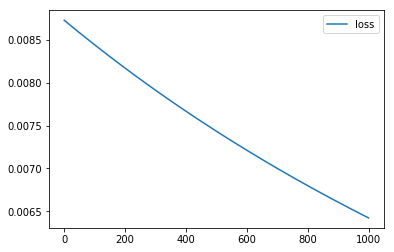

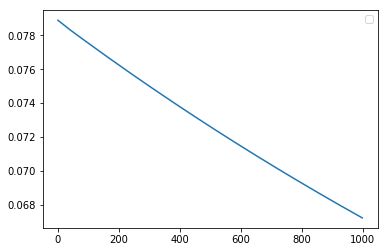

In [14]:
import matplotlib.pyplot as plt
# Let's train the model now.
# Because the output is not categorical, we will use mse as the loss function, 
# and we will default to the simplest default Stochastic Gradient Descent as optimizer 
# to keep thigs as simple as possible

model_sigmoid.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history = model_sigmoid.fit(x, y, epochs=1000, verbose=0)

plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.show()

plt.legend(['accuracy'])
plt.plot(history.history['mean_absolute_error'])
plt.show()

As we can see, after around 900 epochs the error has been reduced to less than 7%. The loss didn't seem to plateau at all so we can assume we could still keep training the model.

And now, let's visualize the outputs of the trained network and see if something has changed. 

In [15]:
# Let's now take a look at the same predictions after training the model

predictions = model_sigmoid.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

[[0.08539537 0.5025013 ]
 [0.36139616 0.63950753]
 [0.06293987 0.9105092 ]
 [0.86371815 0.14529993]
 [0.54719824 0.44822988]]
---
0.9105092 0.06293987
---
0.45666957


We still can see that the values are in the 0-1 interval, but surprisingly, after training (and with only 5 samples) the mean still seems to be around 0.5!!!

IMO This works PRETTY GOOD for a regression problem. Keeep in mind that the output will only be able to predict values in the 0-1 range, so the predictors have to be normalized to that range before training.

-----
Let's now do the same for **tanh**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 2)                 22        
_________________________________________________________________
tanh (Activation)            (None, 2)                 0         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________

~~~ pre-trained predictions
[[-0.817428    0.7983622 ]
 [-0.81588167 -0.67729676]
 [-0.8754055   0.45480895]
 [ 0.2254263  -0.12010006]
 [ 0.60672194  0.7407677 ]]
---
0.7983622 -0.8754055
---
-0.04800248

~~~ model training


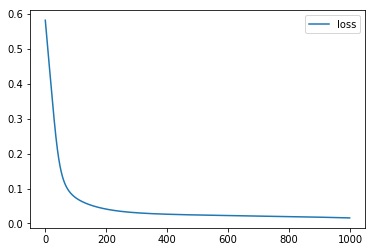

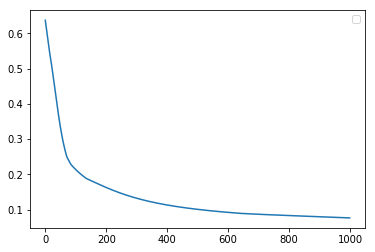


~~~ trained predictions
[[ 0.10835187  0.85022646]
 [ 0.32666954  0.63069993]
 [-0.01816779  0.8927473 ]
 [ 0.87352437 -0.02785367]
 [ 0.5219799   0.49100485]]
---
0.8927473 -0.027853671
---
0.4649183


In [19]:
# tanh
model_tanh = Sequential()
model_tanh.add(Dense(2, input_shape=(10,), name="input"))
model_tanh.add(Activation(tanh, name="tanh"))

model_tanh.summary()

# Let's first take a look at a few predictions of the model without training
print("")
print("~~~ pre-trained predictions")
predictions = model_tanh.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

# we now train the model
print("")
print("~~~ model training")
model_tanh.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history = model_tanh.fit(x, y, epochs=1000, verbose=0)

plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.show()

plt.legend(['accuracy'])
plt.plot(history.history['mean_absolute_error'])
plt.show()

# Now let's see the predictions after trainign
print("")
print("~~~ trained predictions")
predictions = model_tanh.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

Unlike with Sigmoid, the training has been much faster, but the loss and accuracy curves seem to have started finding a plateau though it could still learn a little bit. The minimun accuracy is a little bit higher than with Sigmoid, so it's faster, but a little less accurate.

The predictions after training seem to have shifted to the range from 0 to 1, and the mean has moved towards 0.5.

We can probably guess that the model could work better if we had notmalized the the output from -1 to 1.

IMO This also works PRETTY GOOD for a regression problem. Keeep in mind that the output will only be able to predict values in the -1 to 1 range, so the predictors have to be normalized to that range before training.


----
Let's go now with **softmax**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 2)                 22        
_________________________________________________________________
softmax (Activation)         (None, 2)                 0         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________

~~~ pre-trained predictions
[[0.48311266 0.5168873 ]
 [0.76969826 0.23030177]
 [0.8817927  0.1182073 ]
 [0.61217284 0.38782713]
 [0.09728738 0.90271264]]
---
0.90271264 0.09728738
---
0.5

~~~ model training


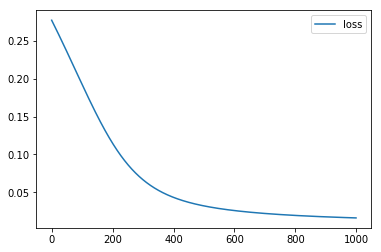

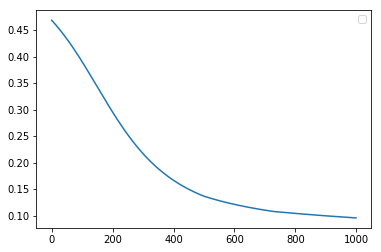


~~~ trained predictions
[[0.25590077 0.74409926]
 [0.29363558 0.70636433]
 [0.18230614 0.8176938 ]
 [0.9200447  0.07995524]
 [0.51006925 0.4899307 ]]
---
0.9200447 0.07995524
---
0.5


In [21]:
# softmax
model_softmax = Sequential()
model_softmax.add(Dense(2, input_shape=(10,), name="input"))
model_softmax.add(Activation(softmax, name="softmax"))

model_softmax.summary()

# Let's first take a look at a few predictions of the model without training
print("")
print("~~~ pre-trained predictions")
predictions = model_softmax.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

# we now train the model
print("")
print("~~~ model training")
model_softmax.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history = model_softmax.fit(x, y, epochs=1000, verbose=0)

plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.show()

plt.legend(['accuracy'])
plt.plot(history.history['mean_absolute_error'])
plt.show()

# Now let's see the predictions after trainign
print("")
print("~~~ trained predictions")
predictions = model_softmax.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

Let's analyze this part by part.

About the pre-trained predictions, we can see that the outputs seem to move in a range of 0-1 but, even though it might seem strange, there's a mean of 0,333. This is caused by the nature of the operation, the mean should be almost aways equal to 1 divided by the number of classes, so 1/3 = 0.333.  
Another interesting thing to note is that the values of each predictions always sum up to one (0.16+0.02+0.82 = 1) this gives us the hint that the output seems like a probability distribution.

About the training, after one partial success (sigmoid) and one failure (tanh) we're very suprised to see this model train so well! We can see that the accuracy reached the 100% after only ~180 epochs (we trained it for 1000) and the shape of the loss tells us that the model is capable to fit even more. Yay!

Finally, about the predictions after training, the mean and variance seem to be the same but looking at the values we can see that (because of the nature of the operation) the model has learned to power up some values close to one while keeping the rest close to 0, there is no ambiguety here like there was with sigmoid. It becomes very obvious to know what the model has learned, and what is the final prediction.

IMO it seems that sigmoid works VERY WELL as a final layer of a categorycal problem! 
Be careful as it will not work as well in hidden layers, as it squishes the hidden values too much, loosing to much information due to the fading gradient !!!

----
Let's go now with **relu**

This is the most popular and used activation, but it's generaly preferred as an activation in the hidden layers, let's see why

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3)                 33        
_________________________________________________________________
relu (Activation)            (None, 3)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________

~~~ pre-trained predictions
[[0.90719795 0.         2.2959151 ]
 [0.         0.33512932 0.        ]
 [0.         0.         0.50429004]
 [0.1005812  1.7293818  1.5515486 ]
 [0.         0.58397263 0.7209135 ]]
---
2.2959151 0.0
---
0.5819287

~~~ model training


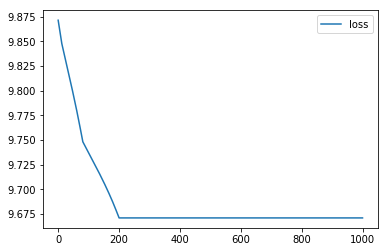

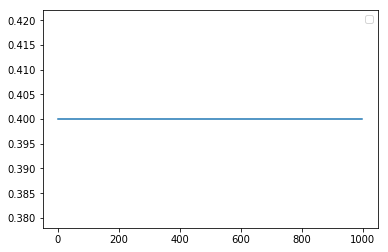


~~~ trained predictions
[[0.         0.         2.016315  ]
 [0.         0.45480382 0.        ]
 [0.         0.         0.8865733 ]
 [0.         2.3501985  0.        ]
 [0.         0.7701211  0.33278725]]
---
2.3501985 0.0
---
0.45405325


In [110]:
# relu
model_relu = Sequential()
model_relu.add(Dense(3, input_shape=(10,), name="input"))
model_relu.add(Activation(relu, name="relu"))

model_relu.summary()

# Let's first take a look at a few predictions of the model without training
print("")
print("~~~ pre-trained predictions")
predictions = model_relu.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

# we now train the model
print("")
print("~~~ model training")
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
history = model_relu.fit(x, y, epochs=1000, verbose=0)

plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.show()

plt.legend(['accuracy'])
plt.plot(history.history['acc'])
plt.show()

# Now let's see the predictions after trainign
print("")
print("~~~ trained predictions")
predictions = model_relu.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

Let's analyze this part by part.

About the pre-trained predictions, the outputs are in a range of 0 to 2,3. Actually, relu doesn't impose a max for the range so the model is in the range of 0-infinity. The mean is 0.58, this doesn't seem to give any information by itself. Looking at the values we see some 0s and some positive values.

About the training, the loss seemes to have hit a plateau after around 200 epochs but the accuracy didn't seem to improve at all getting stuck at 0.4, not good, not goooood :(

Finally, about the predictions after training, the range seems to have increased a little bit, it's now 0 to 2.35 but the mean has decreased being now 0.45. This tells us that relu doesn't follow any kind of distribution, model learned to set some 0s and some positive values, but doesn't seem to have learned the correct predictions.

Why? Because of the nature of the operation, in a single layer of ReLU if the values are 0 there is no way the model will change that, so if the correct value is in a position that the initial prediction set to 0, it will never learn.
We can see a funny consecuence of this, and it's that if we randomize the values enough times so initially any of the correct values is predicted as 0, the model will work pretty well! But in a shallow model this doesn't work :(

IMO it seems that relu doesn't work well as an activation layer for the output of a classification problem. It COULD work though, if we remove the 0s problem by adding some hidden layers, but it will never be the ideal, because it could take much more time to learn if the outputs are very high.

----
Let's go now with **leaky relu**

This is variation of the ReLU that solves the 0s problem, so I'm going to guess that it will work better than the ReLU but let's see.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3)                 33        
_________________________________________________________________
relu (Activation)            (None, 3)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________

~~~ pre-trained predictions
[[ 9.3719065e-01  1.9308243e+00 -2.5536511e-02]
 [-2.9509276e-04  6.1618912e-01  5.6603360e-01]
 [-9.8429620e-03  8.8597006e-01  1.6449414e+00]
 [ 2.6999810e+00  5.3981167e-01 -1.0586169e-02]
 [ 1.3728960e+00  4.5086497e-01 -1.8345760e-02]]
---
2.699981 -0.025536511
---
0.7720064

~~~ model training


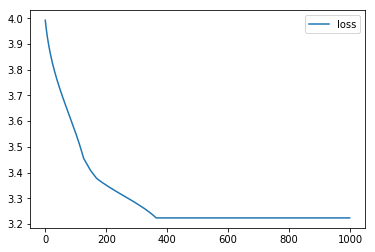

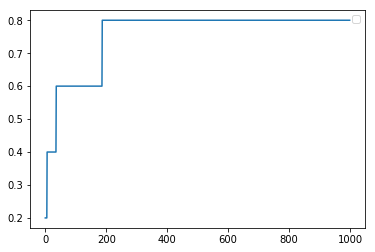


~~~ trained predictions
[[ 5.0316197e-01  1.7596383e+00 -3.2398224e-02]
 [-5.9180479e-03  4.2344630e-04  1.0608001e+00]
 [-3.3544479e-03  1.1593986e+00 -2.0972582e-05]
 [ 5.5771619e-03  2.0479093e+00 -5.7644579e-03]
 [ 8.1088138e-01  6.7752451e-03 -2.0072155e-02]]
---
2.0479093 -0.032398224
---
0.4858025


In [114]:
# lrelu
model_lrelu = Sequential()
model_lrelu.add(Dense(3, input_shape=(10,), name="input"))
model_lrelu.add(LeakyReLU(0.01, name="relu"))

model_relu.summary()

# Let's first take a look at a few predictions of the model without training
print("")
print("~~~ pre-trained predictions")
predictions = model_lrelu.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

# we now train the model
print("")
print("~~~ model training")
model_lrelu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
history = model_lrelu.fit(x, y, epochs=1000, verbose=0)

plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.show()

plt.legend(['accuracy'])
plt.plot(history.history['acc'])
plt.show()

# Now let's see the predictions after trainign
print("")
print("~~~ trained predictions")
predictions = model_lrelu.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

Let's analyze this part by part.

About the pre-trained predictions, the outputs are in a range of -0.03 to 2,7. Actually, relu doesn't impose a max nor a min for the range so the model is in the range of -infinity to infinity. 
We can see though that the movement towards negative values is much smaller, this is caused by the nature of the operation, that multiplies the negative values by x0.01 (this is a parameter, I choose this one arbitrarily).
The mean is 0.77, but as with ReLU this doesn't seem to give any information by itself.

About the training, the loss seemes to decrease properly, but sadly it hits a plateau after 380 epochs. At around 200 epochs the model hits its max accuracy of 80%

Finally, about the predictions after training, the range seems to have shifter a little bit towards 0, it's now 0.033 to 2 but the mean has decreased being now 0.48. This tells us that the leaky relu also doesn't follow any kind of distribution.

IMO it seems that leaky relu is also NOT THE BEST as an activation layer for the output of a classification problem. 
It solves the problem with the 0s that had the ReLU model so it works much better, but it still has a problem fitting high or low values to 0 and 1.

----
Let's go now with **leaky elu**

Finally lets try elu. It's a mistery for me as I do not know the implementation of it, but hopefully this analysis will help us undersdand it better.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3)                 33        
_________________________________________________________________
elu (Activation)             (None, 3)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________

~~~ pre-trained predictions
[[-0.9232144   1.8610909   0.9773937 ]
 [ 0.9129013  -0.2885369  -0.44073778]
 [ 1.5642755   1.8806123   1.7354904 ]
 [-0.7151167   0.4838999  -0.07944727]
 [-0.81829035  0.5162267   0.7964347 ]]
---
1.8806123 -0.9232144
---
0.49753216

~~~ model training


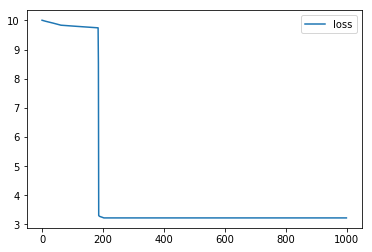

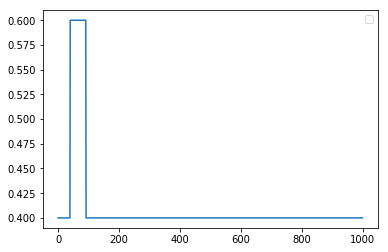


~~~ trained predictions
[[ -0.94915956  -1.           1.2272292 ]
 [  1.0288106   -1.          -0.39465106]
 [  0.33675778 251.8037       0.61315924]
 [ -0.5990375   -1.           0.6220208 ]
 [ -0.83801085  -1.           1.0730296 ]]
---
251.8037 -1.0
---
16.661589


In [119]:
# lrelu
model_elu = Sequential()
model_elu.add(Dense(3, input_shape=(10,), name="input"))
model_elu.add(Activation(elu, name="elu"))

model_elu.summary()

# Let's first take a look at a few predictions of the model without training
print("")
print("~~~ pre-trained predictions")
predictions = model_elu.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

# we now train the model
print("")
print("~~~ model training")
model_elu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
history = model_elu.fit(x, y, epochs=1000, verbose=0)

plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.show()

plt.legend(['accuracy'])
plt.plot(history.history['acc'])
plt.show()

# Now let's see the predictions after trainign
print("")
print("~~~ trained predictions")
predictions = model_elu.predict(x)
print(predictions)
print("---")
print(predictions.max(), predictions.min())
print("---")
print(predictions.mean())

Let's analyze this part by part.

About the pre-trained predictions, the outputs are in a range of -0.93 to 1.9, the mean of 0.5 could give us some hint about the distribution as it's (max+min)/2 , though it could be just a coincidence, or could be a reflection of the intial random weight distribution if the elu operation doesn't reflect a distribution by itself.

About the training, it's a total disaster, not much to say that the graphs don't tell... :(

Finally, about the predictions after training, the range seems to have changed a lot, from -1 to 252!!! 
Looking at the data, there seems to be a minimum at -1 as a lot of values have taken that value and doesn't seem accidental, but it's really weird that a single value has increased to 251 while the rest seem to be kept pretty low!! I don't know the reason for that :( 

About the mean, it's become clear that the previous assumption was just a coincidence, and the mean doesn't seem to follow any distribution.

IMO, as the other ReLU and variations, this doesn't seem like a good activation for classification. In previous experiments I've seen a good performance of this layer for regression problems, but I'm not sure why. It seems to keep some kind of smooth relation between the data like Sigmoid, keeps some properties of ReLU by keeping prositive values unaltered and avoids the 0s problem of leakyRely by setting the min to -1.